In [1]:
import pandas as pd
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Read JSON file into DataFrame
df = pd.read_json('Couvee Seturan.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         250 non-null    object 
 1   google_id    250 non-null    object 
 2   place_id     250 non-null    object 
 3   reviews      250 non-null    int64  
 4   rating       250 non-null    float64
 5   review_id    250 non-null    object 
 6   review_text  250 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.8+ KB


In [41]:
df = df.drop(columns= ['name', 'google_id', 'place_id', 'reviews', 'rating', 'review_id'])

KeyError: "['name', 'google_id', 'place_id', 'reviews', 'rating', 'review_id'] not found in axis"

In [49]:
df.head()


review_text  \
0  Couvee Seturan adalah salah satu tempat nongkr...   
1  couvee dah kaya rumahh, tempatnya nyaman, fasi...   
2  Aku gak tau gimana lagi mengungkapkan rasa cin...   
3  Kopi dengan cita rasa terbaik dan didukung sua...   
4  Couvee Seturan dikenal sebagai cabang yang ram...   

                                        cleaned_text sentiment_vader  \
0  couvee seturan salah nongkrong favorit jogja s...          Netral   
1  couvee dah kaya rumahh tempatnya nyaman fasili...          Netral   
2  gak tau gimana cintaku kopi minggu kesini meni...          Netral   
3  kopi cita terbaik didukung suasana nyaman couv...          Netral   
4  couvee seturan dikenal cabang ramah co worker ...         Positif   

  sentiment_blob  
0         Netral  
1        Negatif  
2        Negatif  
3         Netral  
4        Negatif

In [8]:
# Hapus baris yang kosong
df = df.dropna(subset=['review_text'])

# Reset indeks setelah penghapusan
df.reset_index(drop=True, inplace=True)


In [9]:
# Hapus baris duplikat
df = df.drop_duplicates(subset=['review_text'])


In [11]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = text.lower()  # Mengubah ke huruf kecil
    text = re.sub(r'[^a-z\s]', '', text)  # Menghapus angka dan tanda baca
    tokens = word_tokenize(text)  # Tokenisasi kata
    stop_words = set(stopwords.words('indonesian'))  # Stopwords bahasa Indonesia
    tokens = [word for word in tokens if word not in stop_words]  # Menghapus stopwords
    return " ".join(tokens)

df['cleaned_text'] = df['review_text'].apply(clean_text)


In [13]:
df

review_text  \
0    Couvee Seturan adalah salah satu tempat nongkr...   
1    couvee dah kaya rumahh, tempatnya nyaman, fasi...   
2    Aku gak tau gimana lagi mengungkapkan rasa cin...   
3    Kopi dengan cita rasa terbaik dan didukung sua...   
4    Couvee Seturan dikenal sebagai cabang yang ram...   
..                                                 ...   
245  Aircon too low, kinda freezing inside. Wear wa...   
246  The price lil bit pricey. Not so many choices ...   
247  I am so in love with red velvet latte. Best in...   
248    Thanks for excellent service 👍 barista ok ob ok   
249                The best coffee in town! Love Java!   

                                          cleaned_text  
0    couvee seturan salah nongkrong favorit jogja s...  
1    couvee dah kaya rumahh tempatnya nyaman fasili...  
2    gak tau gimana cintaku kopi minggu kesini meni...  
3    kopi cita terbaik didukung suasana nyaman couv...  
4    couvee seturan dikenal cabang ramah co worker ...  
..                                                 ...  
245  aircon too low kinda freezing inside wear warm...  
246  the price lil bit pricey not so many choices f...  
247  i am so in love with red velvet latte best in ...  
248      thanks for excellent service barista ok ob ok  
249                  the best coffee in town love java  

[250 rows x 2 columns]

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan sentimen
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positif'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negatif'
    else:
        return 'Netral'

In [16]:
df['sentiment_vader'] = df['cleaned_text'].apply(get_sentiment)

In [17]:
df

review_text  \
0    Couvee Seturan adalah salah satu tempat nongkr...   
1    couvee dah kaya rumahh, tempatnya nyaman, fasi...   
2    Aku gak tau gimana lagi mengungkapkan rasa cin...   
3    Kopi dengan cita rasa terbaik dan didukung sua...   
4    Couvee Seturan dikenal sebagai cabang yang ram...   
..                                                 ...   
245  Aircon too low, kinda freezing inside. Wear wa...   
246  The price lil bit pricey. Not so many choices ...   
247  I am so in love with red velvet latte. Best in...   
248    Thanks for excellent service 👍 barista ok ob ok   
249                The best coffee in town! Love Java!   

                                          cleaned_text sentiment_vader  
0    couvee seturan salah nongkrong favorit jogja s...          Netral  
1    couvee dah kaya rumahh tempatnya nyaman fasili...          Netral  
2    gak tau gimana cintaku kopi minggu kesini meni...          Netral  
3    kopi cita terbaik didukung suasana nyaman couv...          Netral  
4    couvee seturan dikenal cabang ramah co worker ...         Positif  
..                                                 ...             ...  
245  aircon too low kinda freezing inside wear warm...         Positif  
246  the price lil bit pricey not so many choices f...          Netral  
247  i am so in love with red velvet latte best in ...         Positif  
248      thanks for excellent service barista ok ob ok         Positif  
249                  the best coffee in town love java         Positif  

[250 rows x 3 columns]

In [32]:
from textblob import TextBlob

# Fungsi untuk mendapatkan sentimen
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positif'
    elif sentiment < 0:
        return 'Negatif'
    else:
        return 'Netral'

df['sentiment_blob'] = df['cleaned_text'].apply(get_sentiment_textblob)


In [33]:
df

review_text  \
0    Couvee Seturan adalah salah satu tempat nongkr...   
1    couvee dah kaya rumahh, tempatnya nyaman, fasi...   
2    Aku gak tau gimana lagi mengungkapkan rasa cin...   
3    Kopi dengan cita rasa terbaik dan didukung sua...   
4    Couvee Seturan dikenal sebagai cabang yang ram...   
..                                                 ...   
245  Aircon too low, kinda freezing inside. Wear wa...   
246  The price lil bit pricey. Not so many choices ...   
247  I am so in love with red velvet latte. Best in...   
248    Thanks for excellent service 👍 barista ok ob ok   
249                The best coffee in town! Love Java!   

                                          cleaned_text sentiment_vader  \
0    couvee seturan salah nongkrong favorit jogja s...          Netral   
1    couvee dah kaya rumahh tempatnya nyaman fasili...          Netral   
2    gak tau gimana cintaku kopi minggu kesini meni...          Netral   
3    kopi cita terbaik didukung suasana nyaman couv...          Netral   
4    couvee seturan dikenal cabang ramah co worker ...         Positif   
..                                                 ...             ...   
245  aircon too low kinda freezing inside wear warm...         Positif   
246  the price lil bit pricey not so many choices f...          Netral   
247  i am so in love with red velvet latte best in ...         Positif   
248      thanks for excellent service barista ok ob ok         Positif   
249                  the best coffee in town love java         Positif   

    sentiment_blob  
0           Netral  
1          Negatif  
2          Negatif  
3           Netral  
4          Negatif  
..             ...  
245        Positif  
246        Positif  
247        Positif  
248        Positif  
249        Positif  

[250 rows x 4 columns]

In [34]:
vader_sentiment_counts = df['sentiment_vader'].value_counts()
blob_sentiment_counts = df['sentiment_blob'].value_counts()
print(vader_sentiment_counts)
print(blob_sentiment_counts)

sentiment_vader
Netral     123
Positif    107
Negatif     20
Name: count, dtype: int64
sentiment_blob
Netral     120
Positif    104
Negatif     26
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7068\440533534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_vader', palette='Set2')


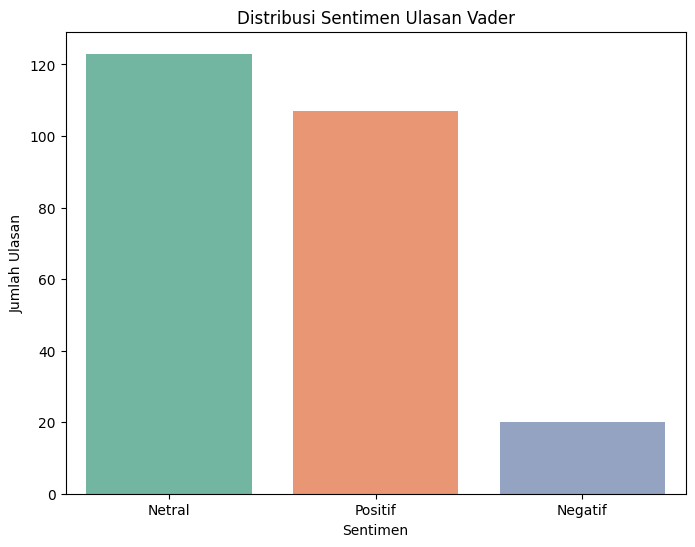

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik distribusi sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_vader', palette='Set2')
plt.title("Distribusi Sentimen Ulasan Vader")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7068\305478049.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_blob', palette='Set3')


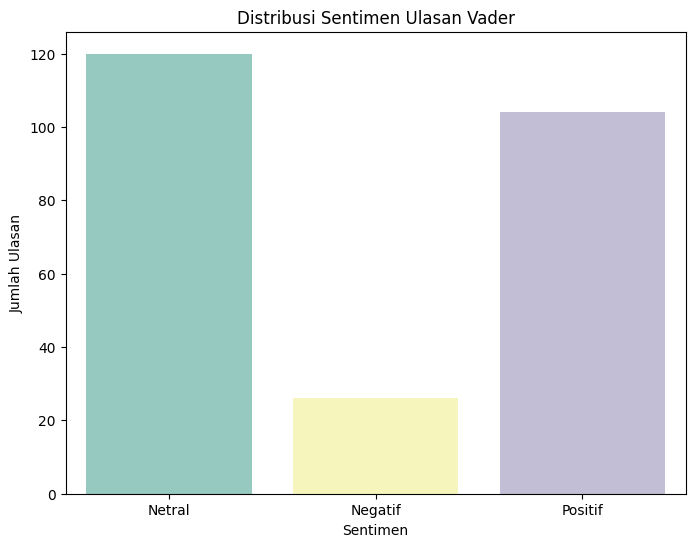

In [36]:
# Grafik distribusi sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_blob', palette='Set3')
plt.title("Distribusi Sentimen Ulasan Vader")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.show()


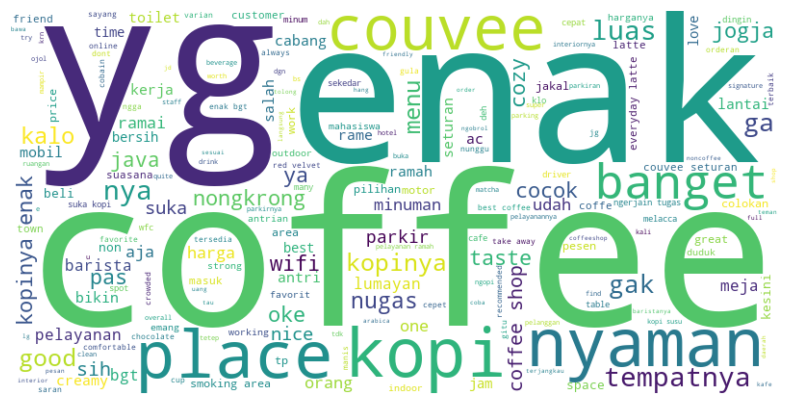

In [26]:
from wordcloud import WordCloud

# Gabungkan semua teks ulasan yang sudah dibersihkan
text = " ".join(df['cleaned_text'])

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


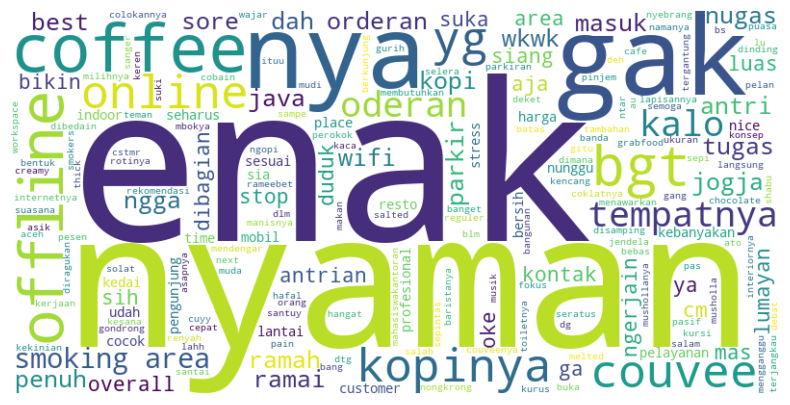

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks ulasan yang sudah dibersihkan dengan sentimen negatif
negative_reviews = df[df['sentiment_vader'] == 'Negatif']['cleaned_text']
text = " ".join(negative_reviews)

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


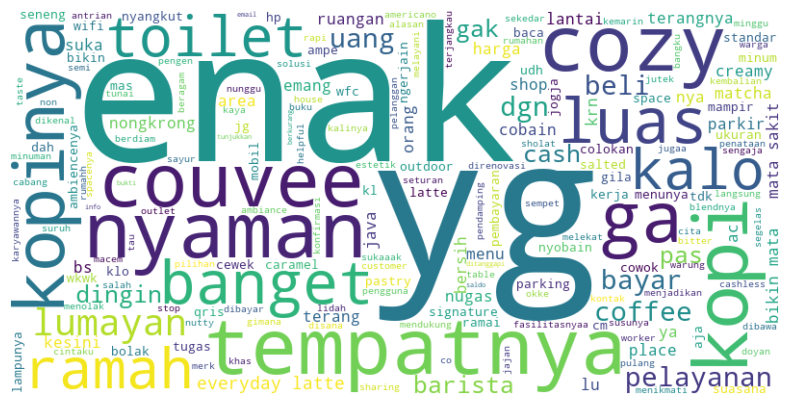

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks ulasan yang sudah dibersihkan dengan sentimen negatif
negative_reviews = df[df['sentiment_blob'] == 'Negatif']['cleaned_text']
text = " ".join(negative_reviews)

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


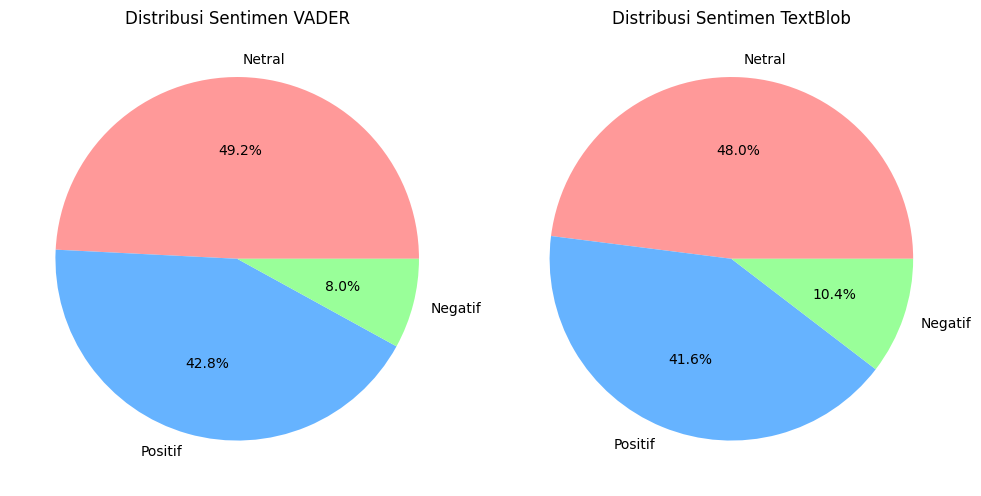

In [39]:
import matplotlib.pyplot as plt

# Distribusi sentimen VADER
vader_sentiment_counts = df['sentiment_vader'].value_counts()

# Distribusi sentimen TextBlob
blob_sentiment_counts = df['sentiment_blob'].value_counts()

# Pie chart untuk VADER
plt.figure(figsize=(10, 5))

# Pie chart VADER
plt.subplot(1, 2, 1)
plt.pie(vader_sentiment_counts, labels=vader_sentiment_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Distribusi Sentimen VADER")

# Pie chart TextBlob
plt.subplot(1, 2, 2)
plt.pie(blob_sentiment_counts, labels=blob_sentiment_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Distribusi Sentimen TextBlob")

# Tampilkan grafik
plt.tight_layout()
plt.show()


In [51]:
from langdetect import detect

# Fungsi untuk mendeteksi bahasa
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Deteksi bahasa untuk setiap ulasan
df['language'] = df['review_text'].apply(detect_language)


In [64]:
df

review_text  \
0    Couvee Seturan adalah salah satu tempat nongkr...   
1    couvee dah kaya rumahh, tempatnya nyaman, fasi...   
2    Aku gak tau gimana lagi mengungkapkan rasa cin...   
3    Kopi dengan cita rasa terbaik dan didukung sua...   
4    Couvee Seturan dikenal sebagai cabang yang ram...   
..                                                 ...   
245  Aircon too low, kinda freezing inside. Wear wa...   
246  The price lil bit pricey. Not so many choices ...   
247  I am so in love with red velvet latte. Best in...   
248    Thanks for excellent service 👍 barista ok ob ok   
249                The best coffee in town! Love Java!   

                                          cleaned_text sentiment_vader  \
0    couvee seturan salah nongkrong favorit jogja s...          Netral   
1    couvee dah kaya rumahh tempatnya nyaman fasili...          Netral   
2    gak tau gimana cintaku kopi minggu kesini meni...          Netral   
3    kopi cita terbaik didukung suasana nyaman couv...          Netral   
4    couvee seturan dikenal cabang ramah co worker ...         Positif   
..                                                 ...             ...   
245  aircon too low kinda freezing inside wear warm...         Positif   
246  the price lil bit pricey not so many choices f...          Netral   
247  i am so in love with red velvet latte best in ...         Positif   
248      thanks for excellent service barista ok ob ok         Positif   
249                  the best coffee in town love java         Positif   

    sentiment_blob language  
0           Netral       id  
1          Negatif       id  
2          Negatif       id  
3           Netral       id  
4          Negatif       id  
..             ...      ...  
245        Positif       en  
246        Positif       en  
247        Positif       en  
248        Positif       en  
249        Positif       en  

[250 rows x 5 columns]

In [65]:
# Pisahkan ulasan berdasarkan bahasa
df_indonesia = df[df['language'] == 'id']
df_english = df[df['language'] == 'en']


In [66]:
# Preprocessing untuk bahasa Indonesia
df_indonesia['cleaned_text'] = df_indonesia['review_text'].apply(clean_text)

# Preprocessing untuk bahasa Inggris
df_english['cleaned_text'] = df_english['review_text'].apply(clean_text)

C:\Users\HP\AppData\Local\Temp\ipykernel_7068\2628724729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indonesia['cleaned_text'] = df_indonesia['review_text'].apply(clean_text)
C:\Users\HP\AppData\Local\Temp\ipykernel_7068\2628724729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['cleaned_text'] = df_english['review_text'].apply(clean_text)


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Ambil daftar stop words bahasa Indonesia dari Sastrawi
stop_factory = StopWordRemoverFactory()
stop_words_indonesian = stop_factory.get_stop_words()

# Vectorizer dengan stop words bahasa Indonesia dari Sastrawi
vectorizer_indonesia = TfidfVectorizer(stop_words=stop_words_indonesian, max_features=1000)
X_indonesia = vectorizer_indonesia.fit_transform(df_indonesia['cleaned_text'])


# TF-IDF untuk bahasa Inggris
vectorizer_english = TfidfVectorizer(stop_words='english', max_features=1000)
X_english = vectorizer_english.fit_transform(df_english['cleaned_text'])



In [68]:
from sklearn.decomposition import LatentDirichletAllocation
# Menampilkan topik-topik yang ditemukan
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [69]:
from sklearn.decomposition import LatentDirichletAllocation

# LDA untuk bahasa Indonesia
lda_indonesia = LatentDirichletAllocation(n_components=5, random_state=42)
lda_indonesia.fit(X_indonesia)

# LDA untuk bahasa Inggris
lda_english = LatentDirichletAllocation(n_components=5, random_state=42)
lda_english.fit(X_english)

# Menampilkan topik-topik untuk bahasa Indonesia
print("Topik Bahasa Indonesia:")
display_topics(lda_indonesia, vectorizer_indonesia.get_feature_names_out(), 10)

# Menampilkan topik-topik untuk bahasa Inggris
print("\nTopik Bahasa Inggris:")
display_topics(lda_english, vectorizer_english.get_feature_names_out(), 10)


Topik Bahasa Indonesia:
Topic #0:
tempatnya enak gak bagus pelayanan banget kopi couvee harga luas
Topic #1:
yg kopi enak banget ga nyaman coffee couvee nugas tempatnya
Topic #2:
enak kopinya nyaman nya kopi couvee bgt pelayanan nongkrong lumayan
Topic #3:
nyaman kopinya recommended enak lantai tempatnya suka pas interior java
Topic #4:
gak kopi nyaman luas antri yg parkir enak menu latte

Topik Bahasa Inggris:
Topic #0:
best coffee town favourite love recomended studying enjoy nice place
Topic #1:
place beverages friends work choices hang table couvee area comfortable
Topic #2:
place coffee great nice latte ok delightful good oknice want
Topic #3:
good coffee place great cozy pretty taste try java super
Topic #4:
coffee place good nice couvee taste shopstaffnya ramah ramahasikk average


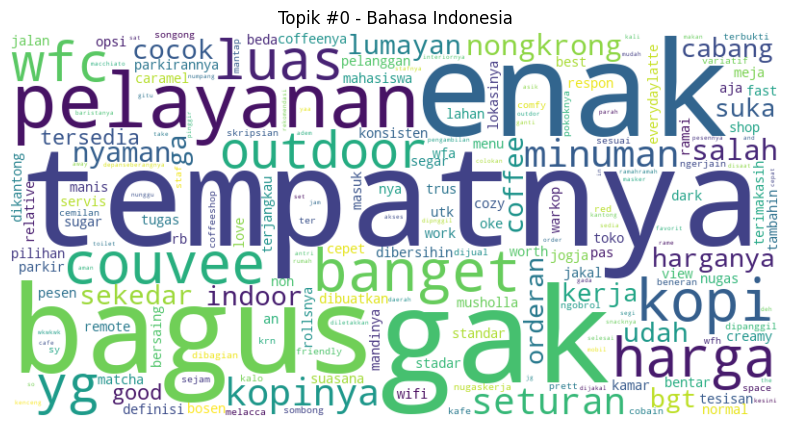

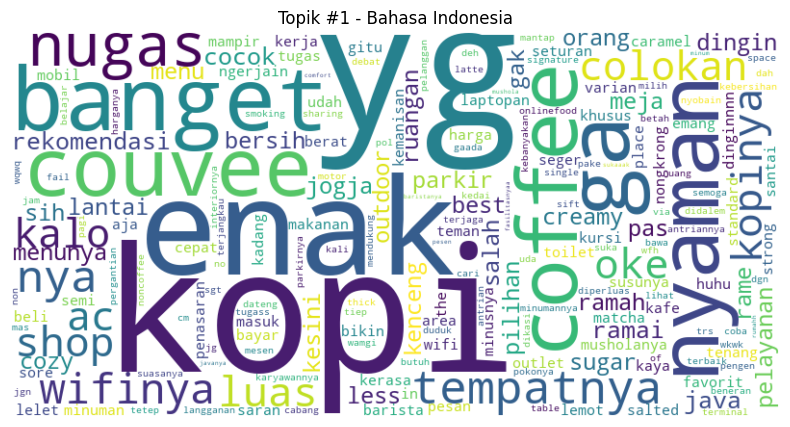

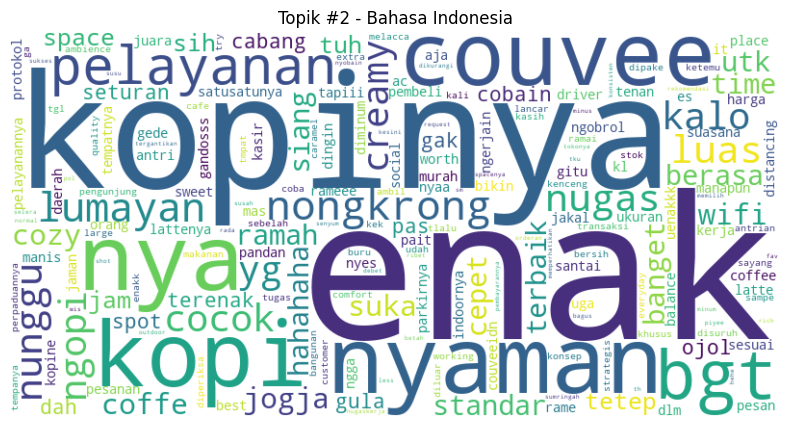

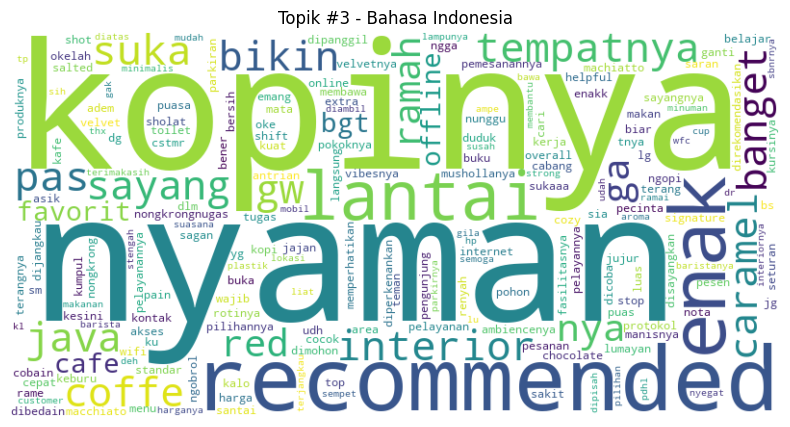

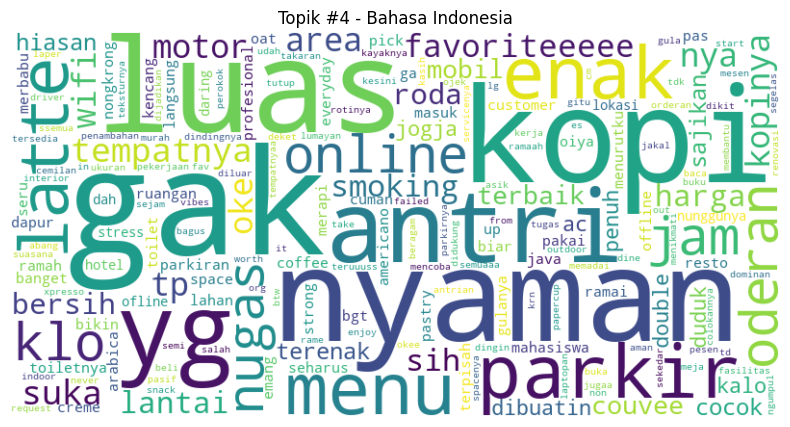

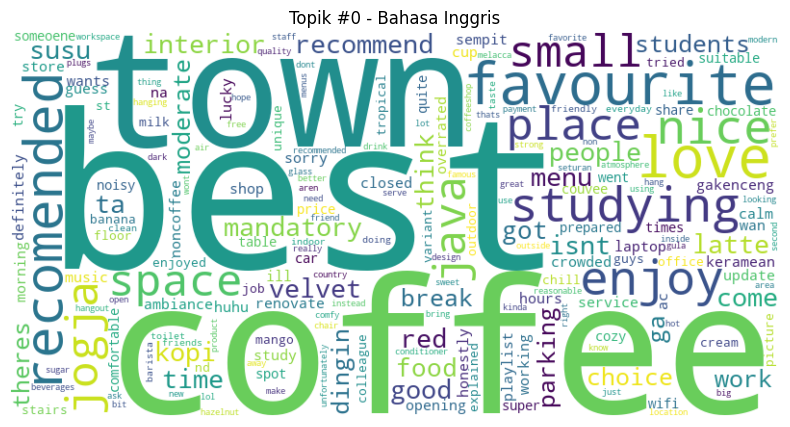

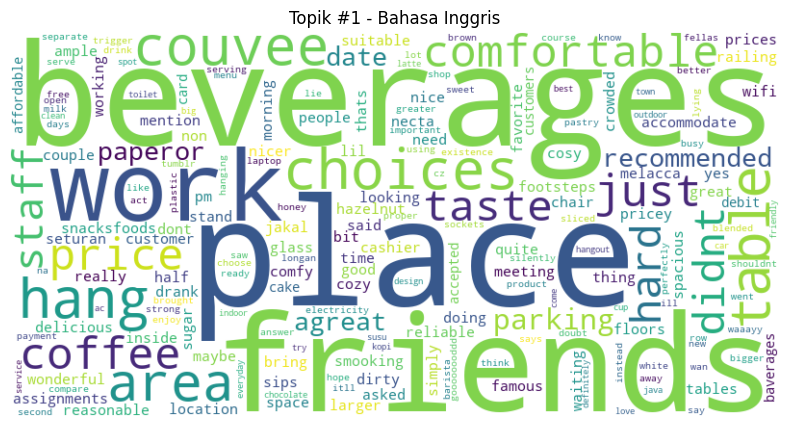

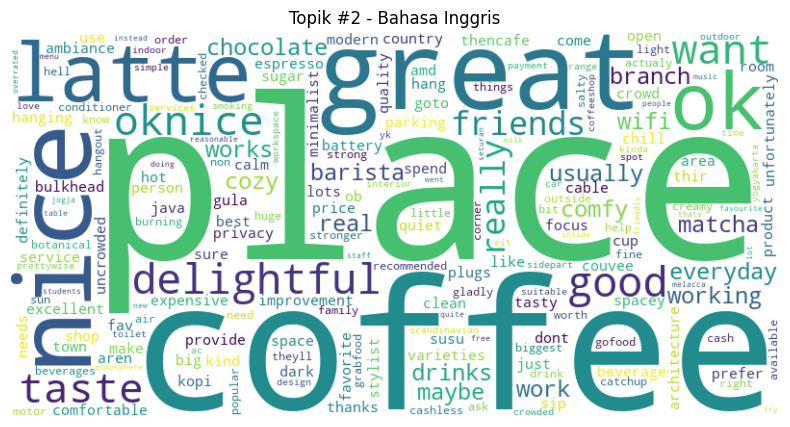

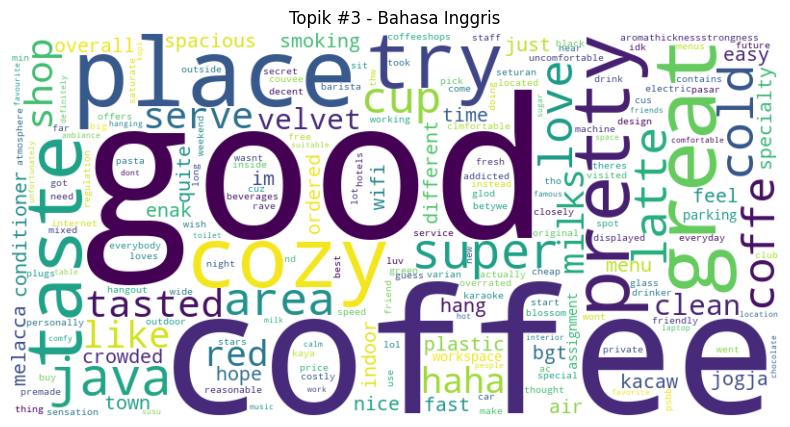

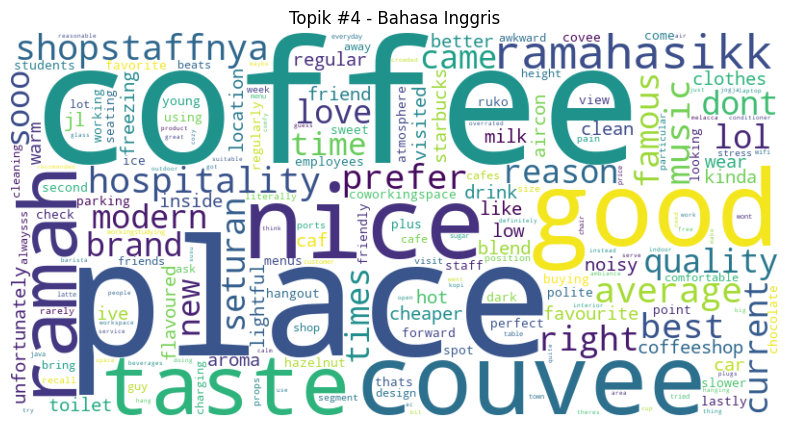

In [70]:
# Wordcloud untuk bahasa Indonesia
for topic_idx, topic in enumerate(lda_indonesia.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer_indonesia.get_feature_names_out(), topic)))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topik #{topic_idx} - Bahasa Indonesia")
    plt.axis("off")
    plt.show()

# Wordcloud untuk bahasa Inggris
for topic_idx, topic in enumerate(lda_english.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer_english.get_feature_names_out(), topic)))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topik #{topic_idx} - Bahasa Inggris")
    plt.axis("off")
    plt.show()


In [71]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Untuk mendukung sinonim multi-bahasa


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [73]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

# 1. Preprocessing
lemmatizer = WordNetLemmatizer()

In [74]:
# Fungsi untuk mendapatkan tag POS yang sesuai untuk WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# 2. Analisis Sentimen dengan SentiWordNet
def analyze_sentiment_swn(text):
    tokens = word_tokenize(text.lower())
    pos_tags = pos_tag(tokens)  # POS tagging
    sentiment_score = 0
    count = 0

    for word, tag in pos_tags:
        wn_tag = get_wordnet_pos(tag)  # Konversi ke POS WordNet
        if wn_tag:  # Jika tag valid
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            synsets = wordnet.synsets(lemma, pos=wn_tag)
            if synsets:
                swn_synset = swn.senti_synset(synsets[0].name())
                sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
                count += 1

    # Rata-rata skor sentimen
    if count > 0:
        sentiment_score /= count

    # Klasifikasi sentimen
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'


In [75]:
# 3. Terapkan Analisis Sentimen
df['sentiment_swn'] = df['review_text'].apply(analyze_sentiment_swn)

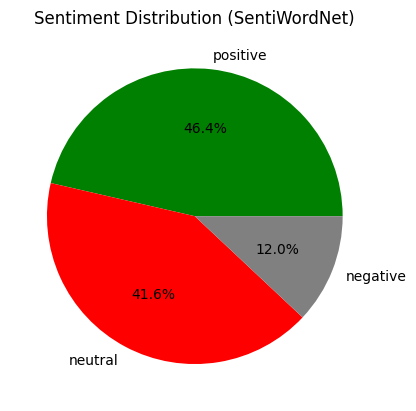

In [76]:
# 4. Visualisasi Hasil
sentiment_counts = df['sentiment_swn'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution (SentiWordNet)')
plt.ylabel('')
plt.show()

In [80]:
# 5. Output
df

review_text  \
0    Couvee Seturan adalah salah satu tempat nongkr...   
1    couvee dah kaya rumahh, tempatnya nyaman, fasi...   
2    Aku gak tau gimana lagi mengungkapkan rasa cin...   
3    Kopi dengan cita rasa terbaik dan didukung sua...   
4    Couvee Seturan dikenal sebagai cabang yang ram...   
..                                                 ...   
245  Aircon too low, kinda freezing inside. Wear wa...   
246  The price lil bit pricey. Not so many choices ...   
247  I am so in love with red velvet latte. Best in...   
248    Thanks for excellent service 👍 barista ok ob ok   
249                The best coffee in town! Love Java!   

                                          cleaned_text sentiment_vader  \
0    couvee seturan salah nongkrong favorit jogja s...          Netral   
1    couvee dah kaya rumahh tempatnya nyaman fasili...          Netral   
2    gak tau gimana cintaku kopi minggu kesini meni...          Netral   
3    kopi cita terbaik didukung suasana nyaman couv...          Netral   
4    couvee seturan dikenal cabang ramah co worker ...         Positif   
..                                                 ...             ...   
245  aircon too low kinda freezing inside wear warm...         Positif   
246  the price lil bit pricey not so many choices f...          Netral   
247  i am so in love with red velvet latte best in ...         Positif   
248      thanks for excellent service barista ok ob ok         Positif   
249                  the best coffee in town love java         Positif   

    sentiment_blob language sentiment_swn  
0           Netral       id      positive  
1          Negatif       id       neutral  
2          Negatif       id      positive  
3           Netral       id      positive  
4          Negatif       id      positive  
..             ...      ...           ...  
245        Positif       en      positive  
246        Positif       en      negative  
247        Positif       en      positive  
248        Positif       en      positive  
249        Positif       en      positive  

[250 rows x 6 columns]

In [81]:
# Simpan DataFrame ke file CSV
df.to_csv('sentiment_analysis_results.csv', index=False, encoding='utf-8')

print("DataFrame berhasil disimpan ke 'sentiment_analysis_results.csv'")


DataFrame berhasil disimpan ke 'sentiment_analysis_results.csv'
